In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime as dt

%matplotlib inline

# Models from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

## MODELING

In [2]:
df = pd.read_csv('data/cleaned_data.csv')

In [3]:
# Create X (Features Matrix)
X = df.drop("satisfaction", axis = 1)
# Create y (labels)
y = df["satisfaction"]
X.shape, y.shape

((129880, 28), (129880,))

In [4]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets
np.random.seed(44)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

We're going to try _three_ different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbors
3. Random Forest

In [5]:
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, roc_curve, plot_roc_curve


# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, Xtrain, Xtest, ytrain, ytest):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    Xtrain: training data (no labels)
    Xtest: testing data (no labels)
    ytrain: training labels
    ytest: test labels
    """
    # Set random seed
    np.random.seed(44)
    # Make a dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        # Fit the model to the data
        model.fit(Xtrain, ytrain)
        # evaluate model and append score
        model_scores[name] = model.score(Xtest, ytest)
    return model_scores

In [6]:
model_scores = fit_and_score(models=models,
                             Xtrain=Xtrain,
                             Xtest=Xtest,
                             ytrain=ytrain,
                             ytest=ytest)
model_scores

{'Logistic Regression': 0.7944512883687507,
 'KNN': 0.8292783081819115,
 'Random Forest': 0.9655322862129145}

## Model Comparison

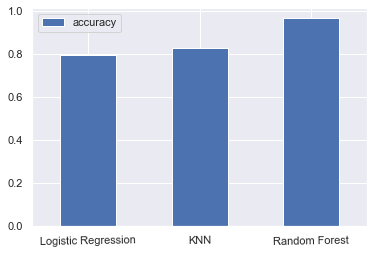

In [7]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()
plt.xticks(rotation=1);

How to improve the baseline metrics?

| classification | regression                     |
| ---------------| -------------------------------|
| **accuracy**   | **r^2**                        |
| precision      | mean absolute error            |
| recall         | maen squared error (MSE)       |
| f1             | root mean squared error (RMSE) |

Ideas:

* hyperparameter tuning
* feature importance
* confusion matrix
* precision
* recall
* f1 score
* classification report
* roc curve
* area under the curve (AUC)

## Hyperparameter Tuning (by Hand)

In [ ]:
# Tune KNN
np.random.seed(44)

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit algorithm
    knn.fit(Xtrain, ytrain)

    # Update training scores list
    train_scores.append(knn.score(Xtrain, ytrain))

    # Update test_scores list
    test_scores.append(knn.score(Xtest, ytest))

In [ ]:
train_scores

In [ ]:
test_scores

In [ ]:
plt.plot(neighbors, train_scores, label='Train Scores')
plt.plot(neighbors, test_scores, label='Test Scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend();

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")

## Hyperparamter Tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression
* RandomForestClassifier

### Tuning Logistic Regression

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [ ]:
# Tune Logistic Regression

np.random.seed(44)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(Xtrain, ytrain)

In [ ]:
rs_log_reg.best_params_

In [ ]:
rs_log_reg.score(Xtest, ytest)

### Tuning Random Forest

In [ ]:
# Tune Random Forest

np.random.seed(44)

# Setup random hyperparameter search for LogisticRegression
rs_rf_reg = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=10,
                               verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_rf_reg.fit(Xtrain, ytrain)

In [ ]:
rs_rf_reg.best_params_

In [ ]:
# Evaluate the tuned model
rs_rf_reg.score(Xtest, ytest)

### Compare hypertuned models

In [ ]:
tuned_model_scores = fit_and_score(models={'RS Logistic Regression': rs_log_reg,
                                           'RS Random Forest': rs_rf_reg},
                                   Xtrain=Xtrain,
                                   Xtest=Xtest,
                                   ytrain=ytrain,
                                   ytest=ytest)
tuned_model_scores

In [ ]:
tuned_model_compare = pd.DataFrame(tuned_model_scores, index=['accuracy'])
tuned_model_compare.T.plot.bar()
plt.xticks(rotation=1);

## Hyperparameter Tuning with GridSearchCV

Since our Logisti Regression model provides the best scores so far, we'll try to improve the model further using GridSearchCV

In [ ]:
# Create a hyperparameter grid for LogisticRegression with liblinear solver
log_reg_libnear_grid = {'C': np.logspace(-4, 4, 30),
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg_liblinear = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit model
gs_log_reg_liblinear.fit(Xtrain, ytrain)

In [ ]:
# Check best parameters
gs_log_reg_liblinear.best_params_

In [ ]:
# Evaluate grid search Logistic Regression model
gs_log_reg_liblinear.score(Xtest, ytest)

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_libnear_grid = {'C': np.logspace(-4, 4, 30),
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg_liblinear = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit model
gs_log_reg_liblinear.fit(Xtrain, ytrain)

In [ ]:
# Create a hyperparameter grid for LogisticRegression with lbfgs solver
log_reg_libnear_grid = {'C': np.logspace(-4, 4, 30),
                'penalty': [None, 'l2'],
                'solver': ['lbfgs']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg_lbfgs = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit model
gs_log_reg_lbfgs.fit(Xtrain, ytrain)

In [ ]:
gs_log_reg_lbfgs.best_params_

In [ ]:
gs_log_reg_lbfgs.score(Xtest, ytest)

In [ ]:
rs_model_scores = fit_and_score(models={'Baseline Logistic Regression': LogisticRegression(max_iter=1000),
                                        'RS Log. Regression': rs_log_reg,
                                        'Grid Search with liblinear': gs_log_reg_liblinear,
                                        'Grid Search with lbfgs': gs_log_reg_lbfgs},
                                   Xtrain=Xtrain,
                                   Xtest=Xtest,
                                   ytrain=ytrain,
                                   ytest=ytest)
rs_model_scores

In [ ]:
rs_model_compare = pd.DataFrame(rs_model_scores, index=['accuracy'])
rs_model_compare.T.plot.bar();

## Evaluating tuned machine learning classifier, beyond accuracy

* ROC curve, AUC curve
* Confusion matrix
* Classificatoin report
* Precision
* Recall
* F1-score

... with cross-validation where possible.

To make comparions and evaluate our trained model, we need to make predictions first.

### ROC curve and AUC metric

In [ ]:
# Make predictions with best tuned model on test/train-split data-
ypreds = rs_log_reg.predict(Xtest)

In [ ]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_log_reg, Xtest, ytest);

### Confusion Matrix

In [ ]:
# Confusion matrix
cm = confusion_matrix(ytest, ypreds)

In [ ]:
# Plot confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm.T, annot=True, fmt='d', annot_kws={"size": 16}, square=True, cbar=False)
plt.xlabel('actual')
plt.ylabel('predictions');

### Classifiction Report

In [ ]:
# Classification Report on train/test-split data
print(classification_report(ytest, ypreds))

### Cross-validated evaluation metrics

In [ ]:
# Check best hyperparameters
rs_log_reg.best_params_

In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.0006951927961775605,
                         solver='liblinear',
                         penalty='l2')

In [ ]:
def average_metric(clf, X, y, scoring):
    """
    Returns the average score on each scoring metric, rounded to 2 decimals.
    clf: scikit-learn classification
    X: features (no labels)
    y: labels
    scoring: scoring metric
    """
    return round((np.mean(cross_val_score(clf, X, y, cv=5, scoring=scoring))), 2)


def average_score_on_cross_val_classification(clf, X, y):
    """
    Evaluates a given model/estimator using cross-validation (5 folds)
    and returns a dict containing the average (mean) scores
    for classification models

    clf: scikit-learn classification
    X: features (no labels)
    y: labels
    """
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    scores = {metric: average_metric(clf, X, y, metric) for metric in metrics}

    return scores

In [ ]:
cv_metrics = average_score_on_cross_val_classification(clf, X, y)
cv_metrics

In [ ]:
# Create visualization
cv_metrics_df = pd.DataFrame(cv_metrics, index=[0])

cv_metrics_df.T.plot.bar(title='Cross-validated classification metrics',
                         legend=False);
